## 1. Setup & Imports

In [36]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Config
import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horse-power', 'peak-rpm', 'city-mpg', 
           'highway-mpg', 'price']

df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 3. Initial Checks & Cleaning

In [39]:
df.shape

(205, 26)

In [40]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    str    
 2   make               205 non-null    str    
 3   fuel-type          205 non-null    str    
 4   aspiration         205 non-null    str    
 5   num-of-doors       205 non-null    str    
 6   body-style         205 non-null    str    
 7   drive-wheels       205 non-null    str    
 8   engine-location    205 non-null    str    
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    str    
 15  num-of-cylinders   205 non-null    str    
 16  engine-size        205 non-null    in

In [41]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [42]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horse-power          0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [43]:
df.replace([' ', '?', 'NaN', ''], value=np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [44]:
df['price'].isna().sum()

np.int64(4)

In [45]:
df = df.dropna(subset=['price'])

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.dtypes.head()

symboling            int64
normalized-losses      str
make                   str
fuel-type              str
aspiration             str
dtype: object

In [48]:
col_convert = ['normalized-losses', 'bore', 'stroke', 'horse-power', 'peak-rpm', 'price']

for col in col_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

symboling              int64
normalized-losses    float64
make                     str
fuel-type                str
aspiration               str
num-of-doors             str
body-style               str
drive-wheels             str
engine-location          str
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type              str
num-of-cylinders         str
engine-size            int64
fuel-system              str
bore                 float64
stroke               float64
compression-ratio    float64
horse-power          float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

## 4. Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horse-power'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

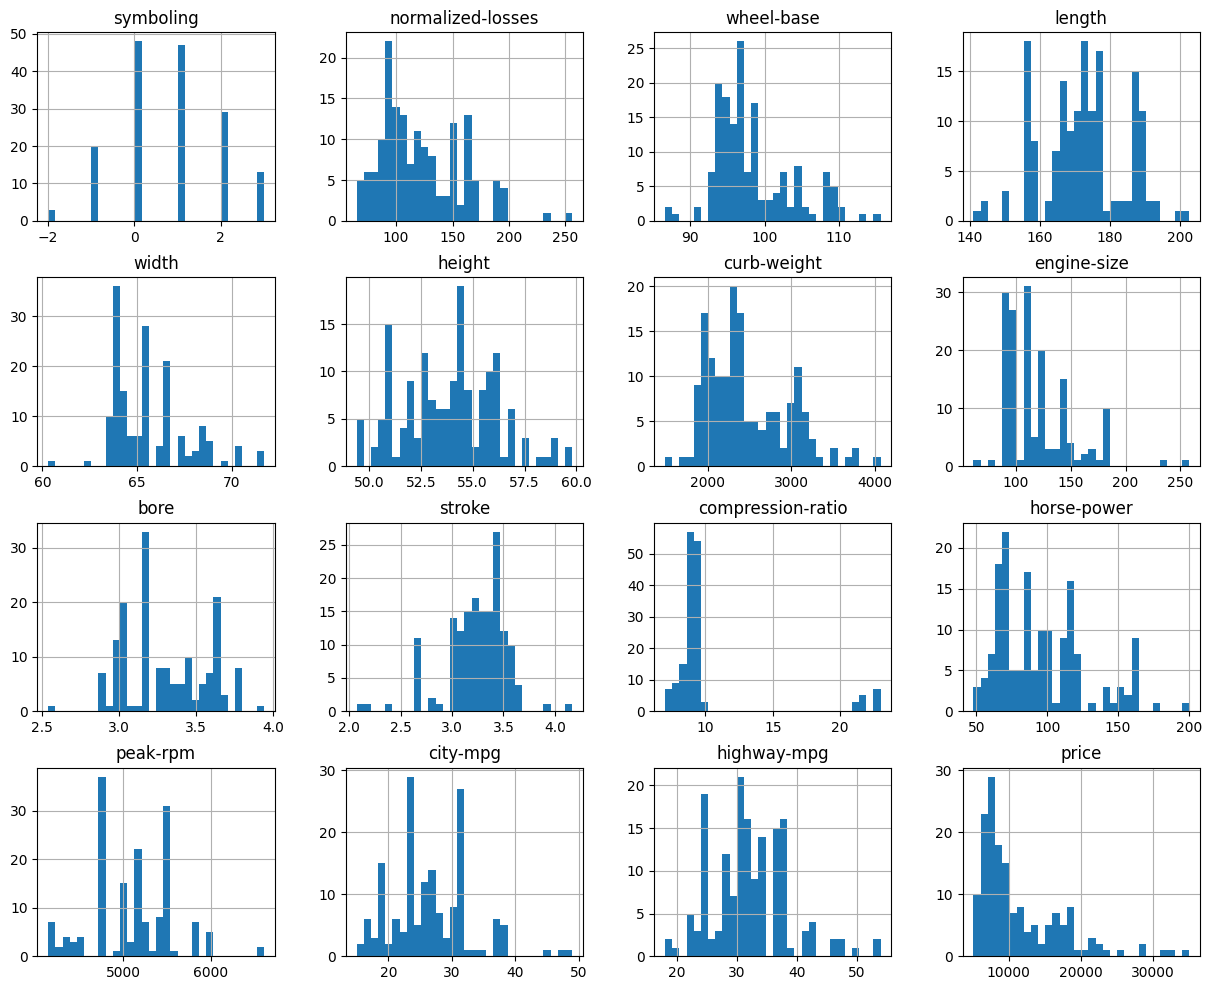

In [49]:
numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                   'bore', 'stroke', 'compression-ratio', 'horse-power', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df[numeric_columns].dropna().hist(bins=30, figsize=(15, 12))

In [50]:
# Most recommended for knowing skewness
skewness = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                   'bore', 'stroke', 'compression-ratio', 'horse-power', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].dropna().skew()

# If > 1 or -1 = Highly Skewed. If Between 0.5 to 1 or -0.5 to -1 = Moderately Skewed

for colu, val in skewness.items():
    if abs(val) < 0.5:
        category = 'Low Skew'
    elif abs(val) < 1:
        category = 'Moderate Skew'
    else:
        category = 'High Skew'
    
    print(f"{colu} | {val:.2f} ({category})")

symboling | 0.09 (Low Skew)
normalized-losses | 0.82 (Moderate Skew)
wheel-base | 0.92 (Moderate Skew)
length | -0.05 (Low Skew)
width | 0.92 (Moderate Skew)
height | 0.17 (Low Skew)
curb-weight | 0.79 (Moderate Skew)
engine-size | 1.50 (High Skew)
bore | 0.17 (Low Skew)
stroke | -1.00 (High Skew)
compression-ratio | 2.72 (High Skew)
horse-power | 0.92 (Moderate Skew)
peak-rpm | 0.14 (Low Skew)
city-mpg | 0.74 (Moderate Skew)
highway-mpg | 0.61 (Moderate Skew)
price | 1.60 (High Skew)


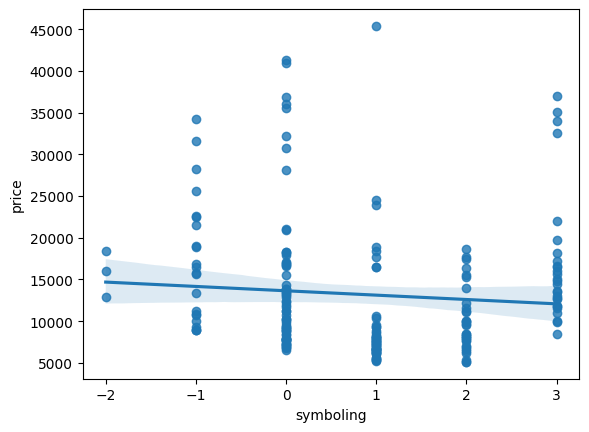

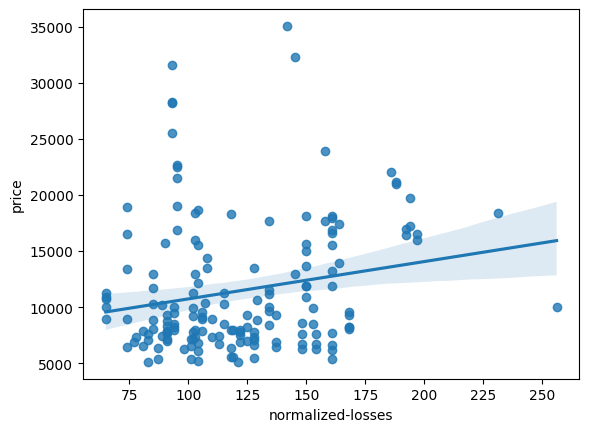

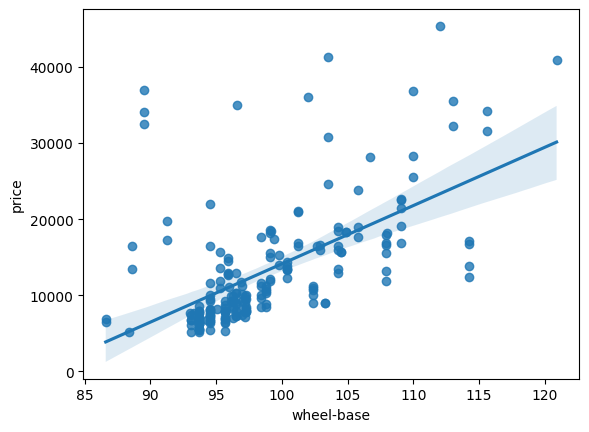

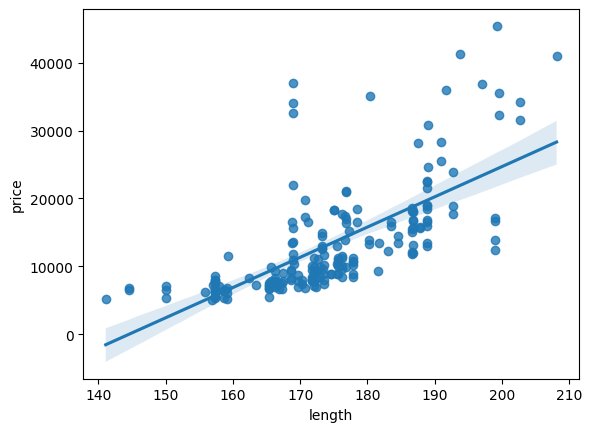

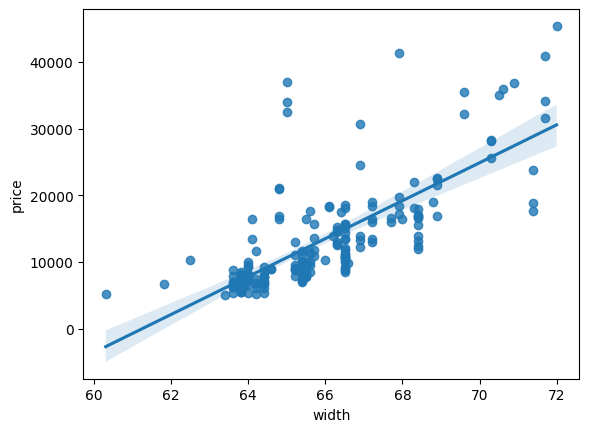

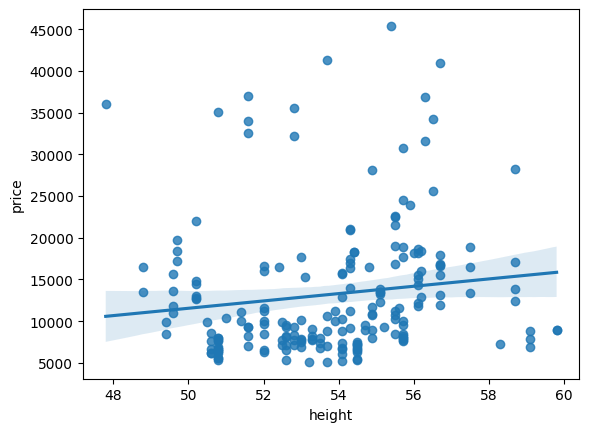

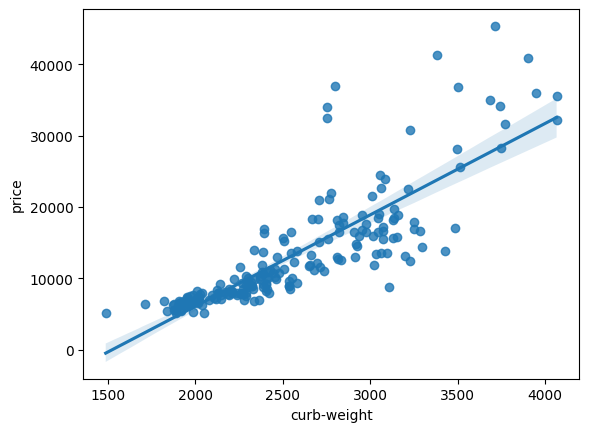

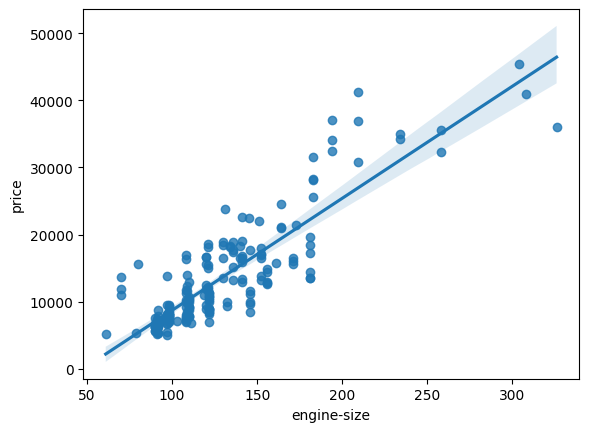

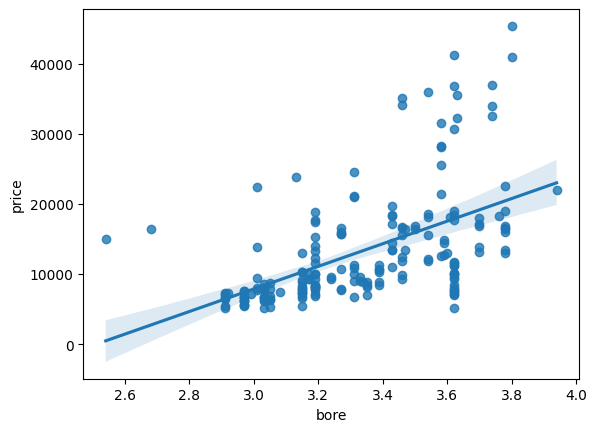

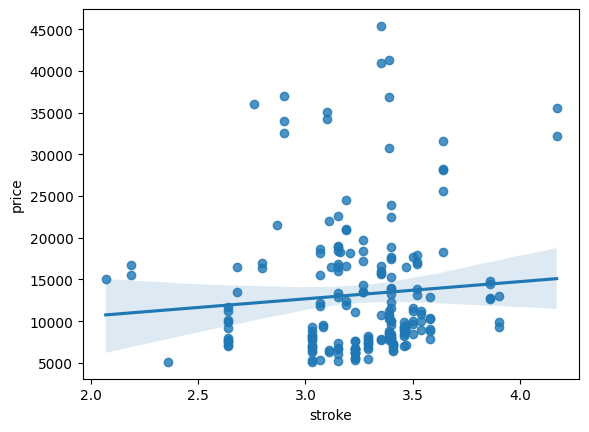

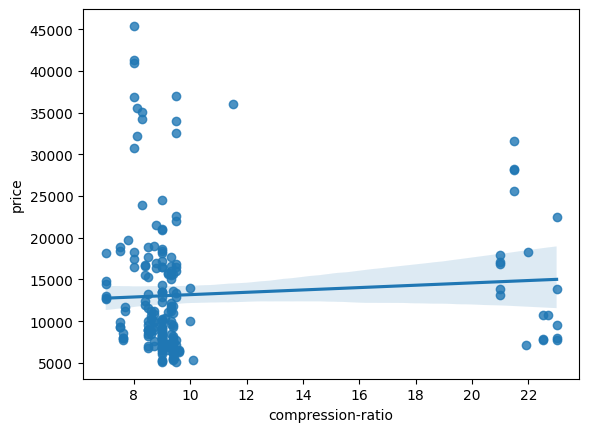

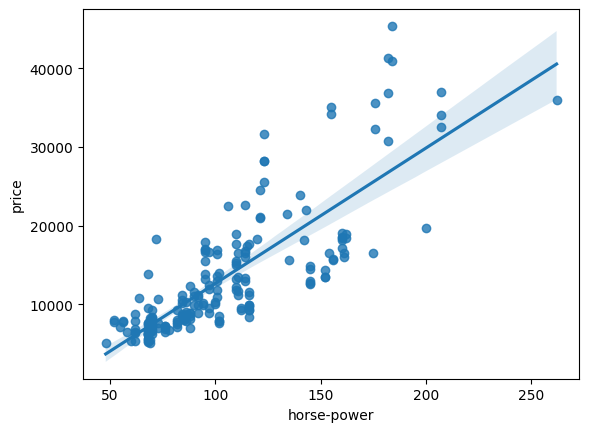

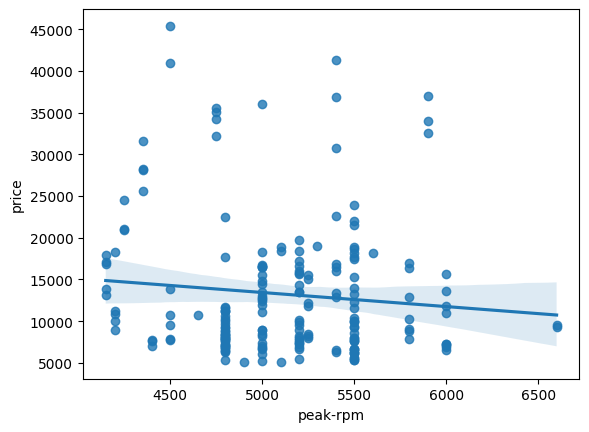

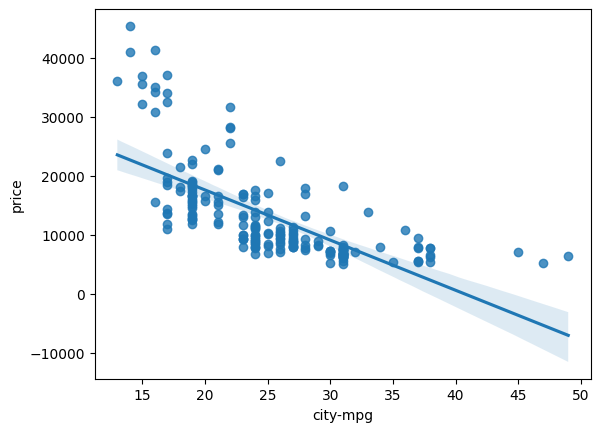

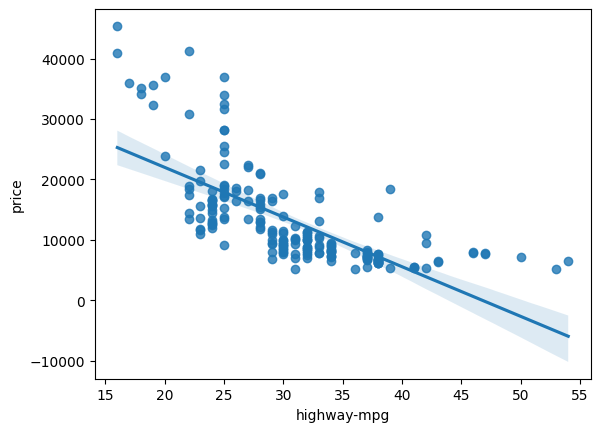

In [51]:
for column in numeric_columns:
    if column != 'price':
        sns.regplot(x=column, y='price', data=df)
        plt.show()

In [52]:
# Checking correlations between the price and numeric columns using pearsonr 
# (Note: All Columns Must be Normally distributed for pearsonr)

from scipy.stats import pearsonr

for col in numeric_columns:
    if col != 'price':
        valid_data = df[[col, 'price']].dropna()
        r, p = pearsonr(valid_data[col], valid_data['price'])
        print(f"{col:20} | r = {r:.3f}, p = {p:.3e}")

symboling            | r = -0.082, p = 2.449e-01
normalized-losses    | r = 0.203, p = 9.046e-03
wheel-base           | r = 0.585, p = 8.076e-20
length               | r = 0.691, p = 8.016e-30
width                | r = 0.751, p = 9.200e-38
height               | r = 0.135, p = 5.515e-02
curb-weight          | r = 0.834, p = 2.190e-53
engine-size          | r = 0.872, p = 9.265e-64
bore                 | r = 0.543, p = 1.567e-16
stroke               | r = 0.082, p = 2.502e-01
compression-ratio    | r = 0.071, p = 3.158e-01
horse-power          | r = 0.811, p = 1.189e-47
peak-rpm             | r = -0.102, p = 1.531e-01
city-mpg             | r = -0.687, p = 2.321e-29
highway-mpg          | r = -0.705, p = 1.750e-31


- r > 0 → higher values of the feature are associated with higher 
- r < 0 → higher values of the feature are associated with lower prices
- |r| close to 1 → strong linear relationship
- |r| close to 0 → weak or no linear relationship

The p-value tests statistical significance of the observed correlation:
- Small p-values (commonly p < 0.05) → correlation unlikely due to chance (statistically significant)
- Large p-values → insufficient evidence of a meaningful linear relationship

These results suggest that car price is most strongly associated with engine and vehicle size/power features, while fuel efficiency relates inversely to price. Weak variables may either have nonlinear relationships or little predictive value in modeling price.

In [53]:
# Checking correlations between the price and numeric columns using spearmanr 
# (Note: All Columns must not be normally distributed for spearmanr) Robust with outliers

from scipy.stats import spearmanr

for col in numeric_columns:
    if col != 'price':
        valid_data = df[[col, 'price']].dropna()
        r, p = spearmanr(valid_data[col], valid_data['price'])
        print(f"{col:20} | r = {r:.3f}, p = {p:.3e}")

symboling            | r = -0.143, p = 4.332e-02
normalized-losses    | r = 0.188, p = 1.596e-02
wheel-base           | r = 0.682, p = 7.948e-29
length               | r = 0.810, p = 4.464e-48
width                | r = 0.812, p = 1.935e-48
height               | r = 0.264, p = 1.543e-04
curb-weight          | r = 0.914, p = 8.676e-80
engine-size          | r = 0.828, p = 5.489e-52
bore                 | r = 0.649, p = 5.774e-25
stroke               | r = 0.118, p = 9.986e-02
compression-ratio    | r = -0.178, p = 1.167e-02
horse-power          | r = 0.851, p = 7.005e-57
peak-rpm             | r = -0.083, p = 2.412e-01
city-mpg             | r = -0.831, p = 1.196e-52
highway-mpg          | r = -0.827, p = 1.005e-51


- ρ > 0 → as the feature increases, price tends to increase
- ρ < 0 → as the feature increases, price tends to decrease
- |ρ| close to 1 → strong monotonic relationship
- p-value tests the significance of the correlation (smaller p-values → statistically significant)

Relative to Pearson, Spearman shows similar ordering of important predictors but generally higher correlation magnitudes, suggesting that the relationship between price and many car attributes is monotonic but not perfectly linear. This helps justify non-linear modeling techniques or transformations when predicting car price.

In [54]:
# Checking correlation between categorical and numeric columns, Numeric is skewed. Median

from scipy.stats import kruskal

categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
                       'engine-type', 'num-of-cylinders', 'fuel-system']

for colum in categorical_columns:
    data = df[[colum, 'price']].dropna()
    groups = [group['price'].values for _, group in data.groupby(colum)]
    h, p = kruskal(*groups)
    print(f"{colum:.20} | H = {h:.3f}, P = {p:.3e}")

make | H = 124.214, P = 1.198e-16
fuel-type | H = 4.185, P = 4.078e-02
aspiration | H = 18.757, P = 1.484e-05
num-of-doors | H = 3.524, P = 6.048e-02
body-style | H = 25.023, P = 4.977e-05
drive-wheels | H = 93.189, P = 5.811e-21
engine-location | H = 7.729, P = 5.433e-03
engine-type | H = 38.039, P = 3.705e-07
num-of-cylinders | H = 80.865, P = 2.368e-15
fuel-system | H = 122.597, P = 2.204e-23


- H₀: All groups for a given categorical feature have the same median price
- H₁: At least one group differs in median price

- H statistic (H): measures the degree of difference between group medians

p-value (p): assesses statistical significance
- Small p-values (commonly p < 0.05) → reject H₀ → price differs across categories
- Large p-values → insufficient evidence of price differences across groups

Categorical variables play an important role in explaining price variation. In particular, brand (make), drivetrain (drive-wheels), engine configuration, and fuel system are strong differentiators of car price. This supports including categorical encodings in predictive models and suggests that price segmentation is influenced not only by performance/size features but also by design choices and brand positioning.

In [55]:
# Checking correlation between 2 categorical columns (ordinal or nominal) using Chi-square.
# Note: Chi-square ignores order

from scipy.stats import chi2_contingency

contigency_table = pd.crosstab(df['fuel-type'], df['aspiration'])
chi2, p, dof, expected = chi2_contingency(contigency_table)
print(f"Chi-square statistics: {chi2} | Degree of freedom: {dof} | P_Value: {p:.3} | Expected frequency: {expected}")

Chi-square statistics: 30.034428365143143 | Degree of freedom: 1 | P_Value: 4.24e-08 | Expected frequency: [[ 16.41791045   3.58208955]
 [148.58208955  32.41791045]]


- H₀: fuel-type and aspiration are independent (no relationship)
- H₁: They are associated (not independent)

The key outputs are:
- Chi-Square statistic (χ² = 29.61): measures the discrepancy between observed and expected frequencies
- Degrees of freedom (df = 1): based on the size of the contingency table
- p-value (p ≈ 5.29 × 10⁻⁸): assesses statistical significance
- Expected frequencies: show what counts would look like if variables were truly independent

Since the p-value is extremely small (p < 0.001), we reject the null hypothesis, indicating a significant association between fuel-type and aspiration. In other words, the distribution of aspiration types differs depending on fuel type.

## 6. Pipeline

In [56]:
robust_numeric_features = ['stroke', 'compression-ratio']
minmax_numeric_features = ['normalized-losses',  'width', 'curb-weight', 'horse-power', 'city-mpg', 'highway-mpg']
standard_numeric_features = ['symboling', 'wheel-base', 'length', 'height', 'engine-size', 'peak-rpm', 'bore']
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
                   'engine-type', 'num-of-cylinders', 'fuel-system']

### Preprocessing

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), robust_numeric_features),

        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), minmax_numeric_features),

        ('standard', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), standard_numeric_features),

        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

### Modelling

In [58]:
models = {
    'Linear': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Polynomial': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),   # scaling polynomial-expanded features
        ('regressor', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(max_iter=10000))
    ]),
    'Lasso': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(max_iter=10000))
    ]),
    'PolynomialRidge': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),   # extra scaling step
        ('regressor', Ridge(max_iter=10000))
    ]),
    'PolynomialLasso': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),   # extra scaling step
        ('regressor', Lasso(max_iter=10000))
    ])
}

In [59]:
X = df.drop(columns=['price'])
y = df['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [61]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}: CV RMSE = {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}, "
          f"Test RMSE = {test_rmse:.2f}")

Linear: CV RMSE = 2566.21 ± 669.91, Test RMSE = 3261.23
Polynomial: CV RMSE = 45635.65 ± 30498.24, Test RMSE = 83913.97
Ridge: CV RMSE = 2402.53 ± 624.21, Test RMSE = 3216.63
Lasso: CV RMSE = 2757.11 ± 678.59, Test RMSE = 3243.21
PolynomialRidge: CV RMSE = 3118.93 ± 644.74, Test RMSE = 2691.14
PolynomialLasso: CV RMSE = 4109.32 ± 1690.13, Test RMSE = 3906.08


1. Linear Regression

CV RMSE: 2566.21 ± 669.91

Test RMSE: 3261.23

- Linear regression serves as a strong baseline. The gap between CV and test RMSE is moderate, indicating reasonable generalization and limited overfitting. However, performance is constrained by the model’s inability to capture non-linear relationships.

Conclusion: Stable but limited expressive power.


2. Polynomial Regression (Unregularized)

CV RMSE: 45,635.65 ± 30,498.24

Test RMSE: 83,913.97

- Unregularized polynomial regression performs extremely poorly. Both CV and test RMSE are very high with substantial variance, demonstrating severe overfitting caused by uncontrolled coefficient growth and feature explosion.

Conclusion: Model is unstable and unsuitable.


3. Ridge Regression

CV RMSE: 2402.53 ± 624.21

Test RMSE: 3216.63

- Ridge regression improves upon linear regression by shrinking coefficients, reducing variance and enhancing generalization. CV RMSE is the lowest among non-polynomial models, confirming the benefit of L2 regularization.

Conclusion: Strong linear model with good bias-variance trade-off.


4. Lasso Regression

CV RMSE: 2757.11 ± 678.59

Test RMSE: 3243.21

- Lasso regression exhibits slightly worse performance than Ridge. While it enforces sparsity by eliminating some coefficients, this appears to remove informative predictors, resulting in higher error.

Conclusion: Useful for feature selection but less optimal for prediction here.


5. Polynomial + Ridge Regression

CV RMSE: 3118.93 ± 644.74

Test RMSE: 2691.14

- This model achieves the lowest test RMSE overall, indicating superior predictive performance. The higher CV RMSE relative to the test RMSE suggests mild pessimism in cross-validation but no evidence of overfitting. Ridge regularization effectively controls polynomial complexity while capturing non-linear relationships.

Conclusion: Best performing model, offering the optimal balance between flexibility and regularization.


6. Polynomial + Lasso Regression

CV RMSE: 4109.32 ± 1690.13

Test RMSE: 3906.08

- Polynomial Lasso suffers from high variance and inferior performance compared to Polynomial Ridge. L1 regularization is overly aggressive in high-dimensional polynomial spaces, leading to underfitting and instability.

Conclusion: Not suitable for polynomial feature spaces in this context.

### Alternatively

In [62]:
param_grids = {
    'Ridge': {
        'regressor__alpha': np.logspace(-3, 3, 10)
    },
    'Lasso': {
        'regressor__alpha': np.logspace(-3, 3, 10)
    },
    'Polynomial': {
        'poly__degree': [2, 3]
    },
    'PolynomialRidge': {
        'poly__degree': [2, 3],
        'regressor__alpha': np.logspace(-3, 3, 10)
    },
    'PolynomialLasso': {
        'poly__degree': [2, 3],
        'regressor__alpha': np.logspace(-3, 3, 10)
    }
}

In [ ]:
results = {}

for name, model in models.items():
    if name in param_grids:
        grid = GridSearchCV(
            model,
            param_grid=param_grids[name],
            scoring='neg_mean_squared_error',
            cv=kf,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        cv_rmse = np.sqrt(-grid.best_score_)
        best_params = grid.best_params_
    else:
        cv_scores = cross_val_score(
            model, X_train, y_train,
            scoring='neg_mean_squared_error',
            cv=kf
        )
        cv_rmse = np.mean(np.sqrt(-cv_scores))
        best_model = model.fit(X_train, y_train)
        best_params = None

    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        'CV RMSE': cv_rmse,
        'Test RMSE': test_rmse,
        'Best Params': best_params,
        'Model': best_model
    }

In [ ]:
for name, res in results.items():
    print(
        f"{name}: CV RMSE = {res['CV RMSE']:.2f},"
        f"Test RMSE = {res['Test RMSE']:.2f},"
        f"Best Params = {res['Best Params']}"
    )

Linear: CV RMSE = 2566.21,Test RMSE = 3261.23,Best Params = None
Polynomial: CV RMSE = 22795.10,Test RMSE = 39545.89,Best Params = {'poly__degree': 3}
Ridge: CV RMSE = 2488.07,Test RMSE = 3519.00,Best Params = {'regressor__alpha': np.float64(2.154434690031882)}
Lasso: CV RMSE = 2590.64,Test RMSE = 3289.00,Best Params = {'regressor__alpha': np.float64(10.0)}
PolynomialRidge: CV RMSE = 2618.78,Test RMSE = 2973.24,Best Params = {'poly__degree': 2, 'regressor__alpha': np.float64(215.44346900318823)}
PolynomialLasso: CV RMSE = 2571.60,Test RMSE = 2996.03,Best Params = {'poly__degree': 2, 'regressor__alpha': np.float64(215.44346900318823)}


1. Linear Regression

CV RMSE: 2566.21

Test RMSE: 3261.23

Best Params: None

- Linear regression provides a stable baseline with moderate generalization error. The gap between CV and test RMSE suggests some limitation in capturing complex relationships, but no strong overfitting is observed.

 Conclusion: Reasonable baseline, but limited by linear assumptions.

2. Polynomial Regression (Unregularized)

CV RMSE: 22,795.10

Test RMSE: 39,545.89

Best Params: Degree = 3

- Even after tuning the polynomial degree, unregularized polynomial regression performs poorly. High CV and test RMSE indicate severe overfitting due to uncontrolled growth in feature interactions.

 Conclusion: Polynomial expansion without regularization is unsuitable for this dataset.

3. Ridge Regression

CV RMSE: 2488.07

Test RMSE: 3519.00

Best Params: α ≈ 2.15

- Ridge regression slightly improves stability compared to linear regression by shrinking coefficients. However, its test RMSE is higher than the baseline linear model, suggesting limited benefit from regularization in the purely linear feature space.

 Conclusion: Regularization stabilizes coefficients but does not substantially improve predictive performance.

4. Lasso Regression

CV RMSE: 2590.64

Test RMSE: 3289.00

Best Params: α = 10

- Lasso regression applies strong regularization, shrinking many coefficients to zero. While this may improve interpretability, predictive performance remains similar to linear regression and slightly worse than Ridge.

 Conclusion: Effective for feature selection but not optimal for minimizing prediction error.

5. Polynomial + Ridge Regression

CV RMSE: 2618.78

Test RMSE: 2973.24

Best Params: Degree = 2, α ≈ 215.44

- Polynomial Ridge regression achieves the lowest test RMSE, indicating the best generalization performance among all models. The relatively large α value suggests strong regularization is required to control the increased complexity from polynomial features.

 Conclusion: Best-performing model, balancing non-linearity and regularization.

6. Polynomial + Lasso Regression

CV RMSE: 2571.60

Test RMSE: 2996.03

Best Params: Degree = 2, α ≈ 215.44

- Polynomial Lasso performs competitively but slightly worse than Polynomial Ridge. The aggressive sparsity imposed by Lasso in a high-dimensional polynomial space leads to marginal underfitting.

Conclusion: Viable alternative, but less stable than Polynomial Ridge.



After hyperparameter tuning using cross-validation, Polynomial Ridge regression achieved the lowest test RMSE, indicating superior generalization performance. Unregularized polynomial regression exhibited severe overfitting despite tuning. Linear and regularized linear models showed stable but comparatively weaker performance, highlighting the importance of controlled non-linearity through regularization.

In [ ]:
import joblib

joblib.dump(results['PolynomialRidge']['Model'], 'price_model.pkl')

KeyError: 'Model'